In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import t, ttest_ind
from pandas import Series, DataFrame
from statsmodels.stats import weightstats as stests

health_issue_df = pd.read_csv('health_concern_countries.csv')

In [2]:
#clearing the data
health_issue_df.dropna(inplace = True)
health_issue_df = health_issue_df[1:]
health_issue_df.reset_index(inplace = True)  
health_issue_df.rename(columns = {'level_0' : 'Country', 'level_1' : 'Diagnosis', 'level_2' : 'Prevention', 'level_3' : 'Symptoms', 'level_4' : 'Diseases', 'level_5' : 'IMDBRating', 'Category: Health' : 'Treatment'}, inplace = True)

health_issue_df.Diagnosis = health_issue_df.Diagnosis.str[:-1].astype(int)
health_issue_df.Prevention = health_issue_df.Prevention.str[:-1].astype(int)
health_issue_df.Symptoms =health_issue_df.Symptoms.str[:-1].astype(int)
health_issue_df.Diseases =health_issue_df.Diseases.str[:-1].astype(int)
health_issue_df.Treatment =health_issue_df.Treatment.str[:-1].astype(int)

print(health_issue_df)
health_issue_df.info()

                 Country  Diagnosis  Prevention  Symptoms  Diseases  Treatment
0                Jamaica          4           2        59        10         25
1          United States          5           2        64         4         25
2              Australia          3           2        62         5         28
3           South Africa          2           3        62         5         28
4         United Kingdom          3           1        68         3         25
5                  Ghana          5           5        48        13         29
6                Ireland          3           1        66         3         27
7            Philippines          4           3        54        10         29
8                  Kenya          5           4        50        12         29
9                 Canada          3           2        67         3         25
10           New Zealand          3           2        63         4         28
11               Nigeria          4           5     

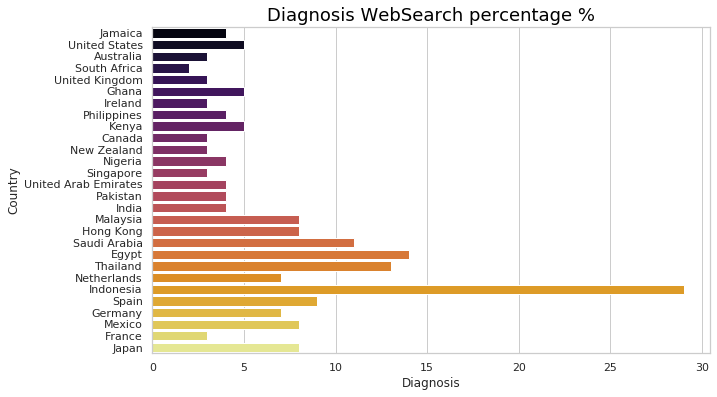

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#palette = sns.color_palette(colors)
sns.barplot(x = 'Diagnosis', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Diagnosis WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('diagnosis_search%.png')

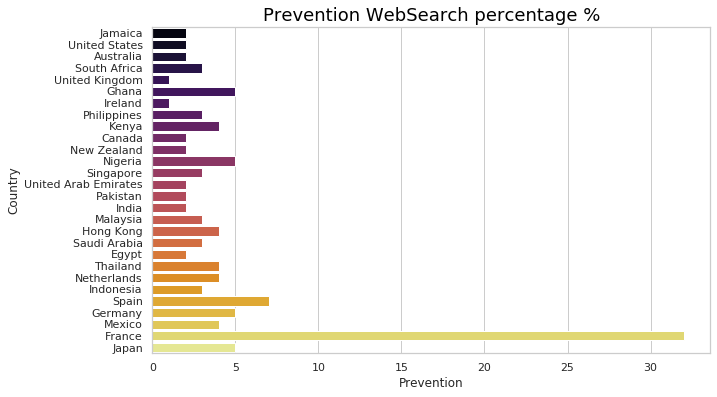

In [4]:
plt.figure(figsize=(10, 6))

sns.barplot(x = 'Prevention', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Prevention WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('prevention_search%.png')

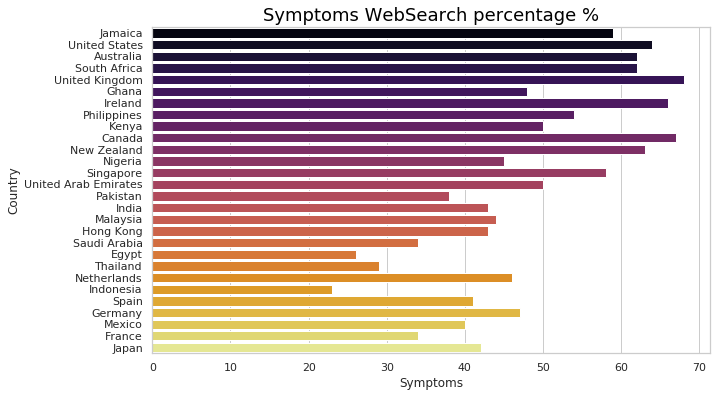

In [5]:
plt.figure(figsize=(10, 6))

sns.barplot(x = 'Symptoms', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Symptoms WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('Symptoms_search%.png')

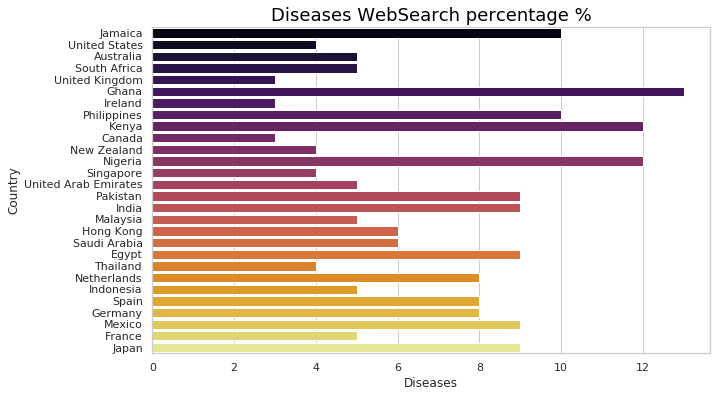

In [6]:
plt.figure(figsize=(10, 6))

sns.barplot(x = 'Diseases', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Diseases WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('Diseases_search%.png')

In [7]:
#refactoring our DataFrame so as to make other plots --> health_issue_df2
health_issue_df2 = pd.melt(health_issue_df, id_vars = 'Country', var_name = 'Key Search', value_name = 'Search %')

print(health_issue_df2)

            Country Key Search  Search %
0           Jamaica  Diagnosis         4
1     United States  Diagnosis         5
2         Australia  Diagnosis         3
3      South Africa  Diagnosis         2
4    United Kingdom  Diagnosis         3
..              ...        ...       ...
135           Spain  Treatment        35
136         Germany  Treatment        33
137          Mexico  Treatment        39
138          France  Treatment        26
139           Japan  Treatment        36

[140 rows x 3 columns]


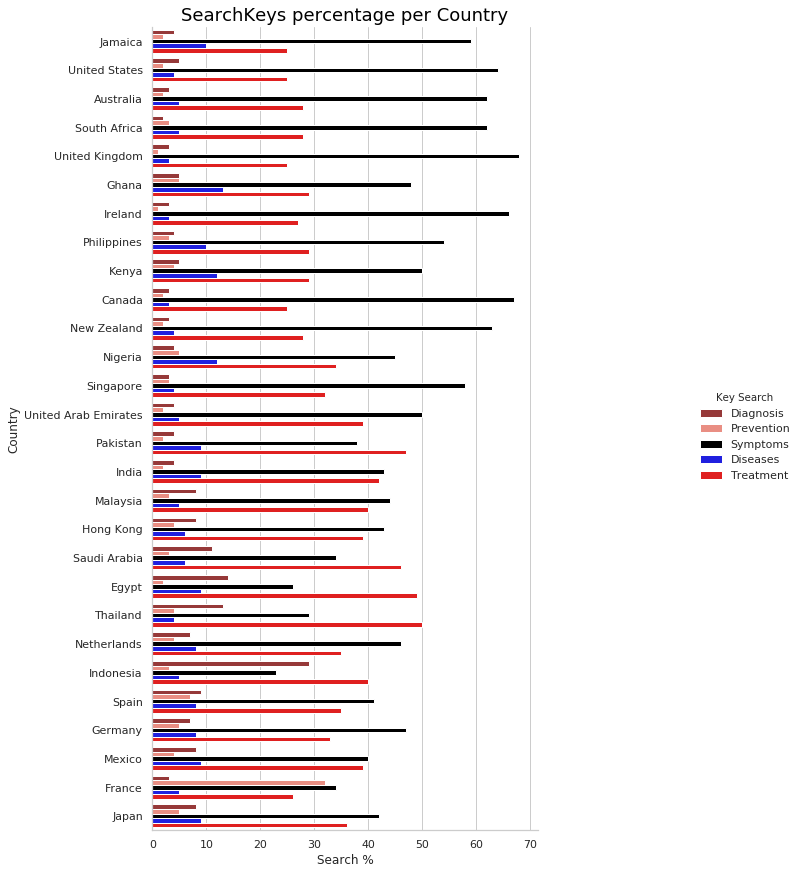

In [8]:
colors = ['brown', 'salmon', 'black', 'blue', 'red']
palette = sns.color_palette(colors)

g = sns.catplot(x = 'Search %', y = 'Country', hue = 'Key Search', data = health_issue_df2, palette = palette, kind = 'bar')
g.fig.set_figwidth(16)
g.fig.set_figheight(13.5)
plt.title('SearchKeys percentage per Country', color = 'black', fontsize = 18)

plt.savefig('searchKeys%_percountry_catplot.png')

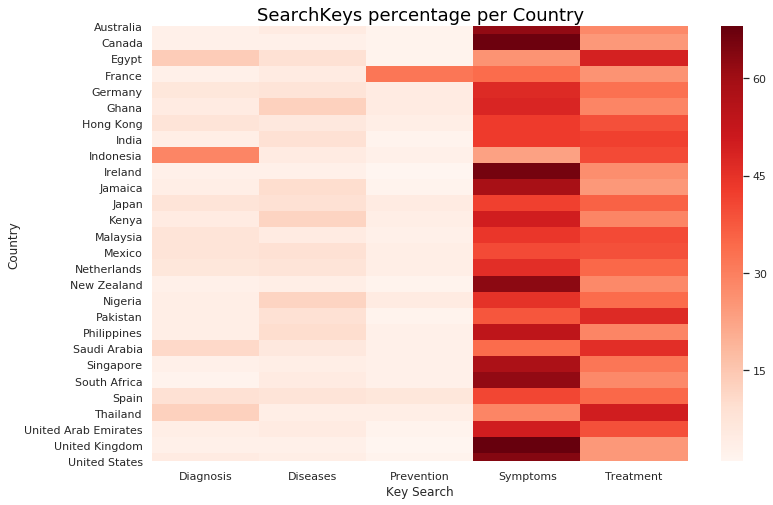

In [9]:
plt.figure(figsize=(12, 8))

a = health_issue_df2.pivot('Country', 'Key Search', 'Search %')
sns.heatmap(a, cmap='Reds')

plt.title('SearchKeys percentage per Country', color = 'black', fontsize = 18)

plt.savefig('countries_keysearch%_heatmap.png')

In [10]:
#g = sns.scatterplot(x = 'Search %', y = 'Country', hue = 'Key Search', data = health_issue_df, palette = palette)
#g.fig.set_figwidth(16)
#g.fig.set_figheight(13.5)

In [11]:
#refactoring our DataFrame so as to make other plots --> health_issue_df3
health_issue_df3 = health_issue_df.sum()
health_issue_df3 = health_issue_df3[1:]
health_issue_df3 = pd.DataFrame(health_issue_df3)
health_issue_df3.reset_index(inplace = True)  
health_issue_df3.rename(columns = {'index':'Key Search', 0: 'Search %'}, inplace = True)
health_issue_df3['Search %'] = health_issue_df3['Search %']/len(health_issue_df)

print(health_issue_df3)

   Key Search Search %
0   Diagnosis  6.57143
1  Prevention  4.17857
2    Symptoms  48.0714
3    Diseases  6.89286
4   Treatment  34.2857


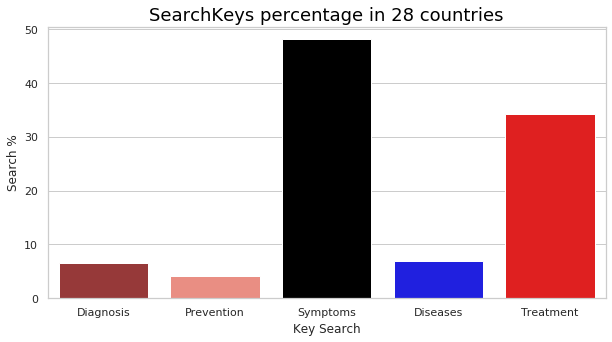

In [12]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'Key Search', y = 'Search %', palette = palette, data = health_issue_df3 )

plt.title('SearchKeys percentage in 28 countries', color = 'black', fontsize = 18)

plt.savefig('28countries_searchkeys%_barplot.png')